## Coursera Final Assessment 

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## About dataset
This dataset is about past loans. The Loan_train.csv data set includes details of 346 customers whose loan are already paid off or defaulted.

Let Download the DataSet.

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-03-25 13:33:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-03-25 13:33:59 (14.1 MB/s) - ‘loan_train.csv’ saved [23101/23101]



## Load Data From CSV File

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   
3           4             4     PAIDOFF       1000     30       9/9/2016   
4           6             6     PAIDOFF       1000     30       9/9/2016   

    due_date  age             education  Gender  
0  10/7/2016   45  High School or Below    male  
1  10/7/2016   33              Bechalor  female  
2  9/22/2016   27               college    male  
3  10/8/2016   28               college  female  
4  10/8/2016   29               college    male

In [4]:
df.shape

(346, 10)

# Convert to Date Time Object

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  
0 2016-10-07   45  High School or Below    male  
1 2016-10-07   33              Bechalor  female  
2 2016-09-22   27               college    male  
3 2016-10-08   28               college  female  
4 2016-10-08   29               college    male

## Data visualization and pre-processing
Let’s see how many of each class is in our data set

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection

Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



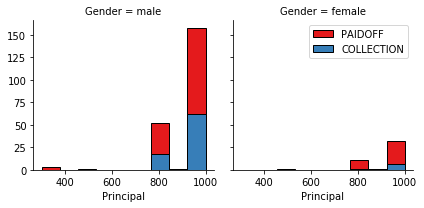

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

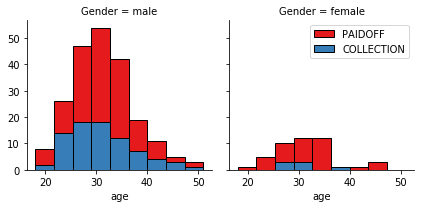

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing: Feature selection/extraction
## Lets look at the day of the week people get the loan

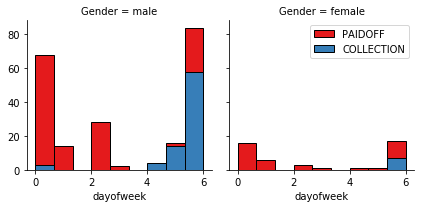

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

## Lets look at the Months people get the loan

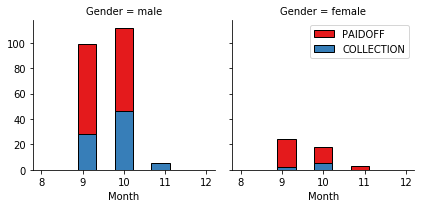

In [11]:
df['Month'] = df.due_date.dt.month
bins = np.linspace(df.Month.min()-1, df.Month.max()+1, 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

There is higher possibility that people pay off the loan in 9th month than paying it in 10th or 11th.

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  Month  weekend  
0 2016-10-07   45  High School or Below    male          3     10        0  
1 2016-10-07   33              Bechalor  female          3     10        0  
2 2016-09-22   27               college    male          3      9        0  
3 2016-10-08   28               college  female          4     10        1  
4 2016-10-08   29               college    male          4     10        1

## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

Lets convert male to 0 and female to 1:

In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  Month  weekend  
0 2016-10-07   45  High School or Below       0          3     10        0  
1 2016-10-07   33              Bechalor       1          3     10        0  
2 2016-09-22   27               college       0          3      9        0  
3 2016-10-08   28               college       1          4     10        1  
4 2016-10-08   29               college       0          4     10        1

# One Hot Encoding

#### How about education?

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()


Principal  terms  age  Gender             education
0       1000     30   45       0  High School or Below
1       1000     30   33       1              Bechalor
2       1000     15   27       0               college
3       1000     30   28       1               college
4       1000     30   29       0               college

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1

### Feature selection
Lets defind feature sets, X:

In [18]:
X = Feature
X[0:5]

Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1

What are our lables?

In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=6)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


## Classification
Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:
1. K Nearest Neighbor(KNN)
2. Decision Tree
3. Support Vector Machine
4. Logistic Regression

# K Nearest Neighbor(KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
nb = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

y_pred = nb.predict(X_test)
y_pred[0:5]

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF'],
      dtype=object)

In [23]:
# Checking the accuracy for the trained model
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, nb.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.8188405797101449
Test set Accuracy:  0.7714285714285715


In [24]:
# Finding the best `k` for the model
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    nb = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = nb.predict(X_test)
    
    # Calculating accuracy for each k    
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
    std_acc[n-1] = np.std(y_pred == y_test)/np.sqrt(y_pred.shape[0])

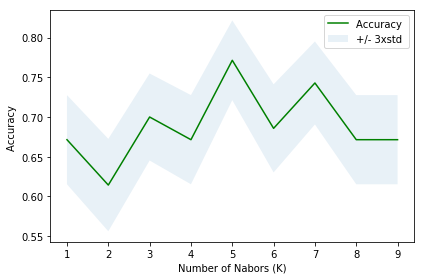

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7714285714285715 with k= 5


In [27]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [28]:
print(' ==================== Accuracy for KNN Training data set ====================')
print('Jaccard Similarity Score - ', jaccard_similarity_score(y_test, y_pred))
print('F1 Score - ', f1_score(y_test, y_pred, average='weighted'))

 ==================== Accuracy for KNN Training data set ====================
Jaccard Similarity Score -  0.6714285714285714
F1 Score -  0.6676362406460069


# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [30]:
loan_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
pred_tree = loan_tree.predict(X_test)

In [32]:
print(' ==================== Accuracy for Decision Tree Training data set ====================')
print("Metrics Accuracy Score: ", metrics.accuracy_score(y_test, pred_tree))
print("Jaccardy Similarity Score: ", jaccard_similarity_score(y_test, pred_tree))
print("F1-Score: ", f1_score(y_test, pred_tree, average='weighted') )

 ==================== Accuracy for Decision Tree Training data set ====================
Metrics Accuracy Score:  0.7285714285714285
Jaccardy Similarity Score:  0.7285714285714285
F1-Score:  0.7181999733723873


# Support Vector Machine

In [34]:
from sklearn import svm
clfr = svm.SVC(kernel='rbf')
clfr.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
y_spred = clfr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 1 15]
 [ 4 50]]


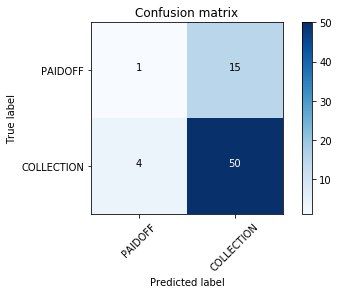

In [37]:
cnf_matrix =confusion_matrix(y_test, y_spred)

plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [38]:
print(' ==================== Accuracy for SVM Training data set ====================')
print("Metrics Accuracy Score: ", metrics.accuracy_score(y_test, y_spred))
print("Jaccardy Similarity Score: ", jaccard_similarity_score(y_test, y_spred))
print("F1-Score: ", f1_score(y_test, y_spred, average='weighted') )

 ==================== Accuracy for SVM Training data set ====================
Metrics Accuracy Score:  0.7285714285714285
Jaccardy Similarity Score:  0.7285714285714285
F1-Score:  0.670028011204482


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
y_log_pred = lrm.predict(X_test)
y_log_pred_pr = lrm.predict_proba(X_test)
from sklearn.metrics import log_loss


In [40]:
print(' ==================== Accuracy for Logistic Regression Training data set ====================')
print("Metrics Accuracy Score: ", metrics.accuracy_score(y_test, y_log_pred))
print("Jaccardy Similarity Score: ", jaccard_similarity_score(y_test, y_log_pred))
print("F1-Score: ", f1_score(y_test, y_log_pred, average='weighted'))
print("Log losss Score: ", log_loss(y_test, y_log_pred_pr))

 ==================== Accuracy for Logistic Regression Training data set ====================
Metrics Accuracy Score:  0.7571428571428571
Jaccardy Similarity Score:  0.7571428571428571
F1-Score:  0.7305341614906832
Log losss Score:  0.5715597445559014


# Model Evaluation using Test set

In [41]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [42]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-03-25 14:14:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-03-25 14:14:51 (382 MB/s) - ‘loan_test.csv’ saved [3642/3642]



#### Load Test Set for Evaluation

In [43]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           1             1     PAIDOFF       1000     30       9/8/2016   
1           5             5     PAIDOFF        300      7       9/9/2016   
2          21            21     PAIDOFF       1000     30      9/10/2016   
3          24            24     PAIDOFF       1000     30      9/10/2016   
4          35            35     PAIDOFF        800     15      9/11/2016   

    due_date  age             education  Gender  
0  10/7/2016   50              Bechalor  female  
1  9/15/2016   35       Master or Above    male  
2  10/9/2016   43  High School or Below  female  
3  10/9/2016   26               college    male  
4  9/25/2016   29              Bechalor    male

In [44]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_df[['Principal','terms','age','Gender','education']].head()

Principal  terms  age  Gender             education
0       1000     30   50       1              Bechalor
1        300      7   35       0       Master or Above
2       1000     30   43       1  High School or Below
3       1000     30   26       0               college
4        800     15   29       0              Bechalor

In [45]:
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   50       1        0         1                     0   
1        300      7   35       0        1         0                     0   
2       1000     30   43       1        1         0                     1   
3       1000     30   26       0        1         0                     0   
4        800     15   29       0        1         1                     0   

   college  
0        0  
1        0  
2        0  
3        1  
4        0

In [46]:
X_t = Feature_test
X_t= preprocessing.StandardScaler().fit(X_t).transform(X_t)
y_t = test_df['loan_status'].values
y_test_pred = nb.predict(X_t)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [47]:
j_knn = jaccard_similarity_score(y_t, y_test_pred)
f_knn = f1_score(y_t, y_test_pred, average = 'weighted')

print("<======== :: Accuracies for model trained with KNN :: ========>")
print("Jaccard Similarity Score :: ", j_knn)
print("F1-Score :: ", f_knn)

<======== :: Accuracies for model trained with KNN :: ========>
Jaccard Similarity Score ::  0.7222222222222222
F1-Score ::  0.7105756358768406


In [48]:
pred_test_tree = loan_tree.predict(X_t)

In [49]:
j_des = jaccard_similarity_score(y_t, pred_test_tree)
f_des = f1_score(y_t, pred_test_tree, average = 'weighted')

print("<======== :: Accuracies for model trained with Decision Tree :: ========>")
print("Jaccard Similarity Score :: ", j_des)
print("F1-Score :: ", f_des)

<======== :: Accuracies for model trained with Decision Tree :: ========>
Jaccard Similarity Score ::  0.8333333333333334
F1-Score ::  0.831275720164609


In [50]:
y_test_spred = clfr.predict(X_t)

In [51]:
j_svm = jaccard_similarity_score(y_t, y_test_spred)
f_svm = f1_score(y_t, y_test_spred, average = 'weighted')

print("<======== :: Accuracies for model trained with SVM :: ========>")
print("Jaccard Similarity Score :: ", j_svm)
print("F1-Score :: ", f_svm)

<======== :: Accuracies for model trained with SVM :: ========>
Jaccard Similarity Score ::  0.7222222222222222
F1-Score ::  0.6491417079652374


In [52]:
y_test_log_pred = lrm.predict(X_t)
y_t_prb = lrm.predict_proba(X_t)

In [53]:
j_log = jaccard_similarity_score(y_t, y_test_log_pred)
f_log = f1_score(y_t, y_test_log_pred, average = 'weighted')
l_log = log_loss(y_t, y_t_prb)
print("<======== :: Accuracies for model trained with Logistic Regression :: ========>")
print("Jaccard Similarity Score :: ", j_log)
print("F1-Score :: ", f_log)
print("Log loss :: ", l_log)

<======== :: Accuracies for model trained with Logistic Regression :: ========>
Jaccard Similarity Score ::  0.8148148148148148
F1-Score ::  0.7736625514403292
Log loss ::  0.5646768163485972


In [54]:

report = {
    'Jaccard' : {
        'KNN': j_knn,
        'Decision Tree': j_des,
        'SVM': j_svm,
        'Logistic Regression': j_log,
    },
    'F1-Score' : {
        'KNN': f_knn,
        'Decision Tree': f_des,
        'SVM': f_svm,
        'Logistic Regression': f_log,
    },
    'LogLoss' : {
        'Logistic Regression': l_log,
    },
}

In [55]:
r_df = pd.DataFrame(report)
r_df

Jaccard  F1-Score   LogLoss
Decision Tree        0.833333  0.831276       NaN
KNN                  0.722222  0.710576       NaN
Logistic Regression  0.814815  0.773663  0.564677
SVM                  0.722222  0.649142       NaN

#### Final Report is Above.